In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm


In [3]:
# CAS API Keys
api_key = "85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98"

#base_url = "https://api.census.gov/data/2014/acs/acs1"


In [4]:
# Importing the Data
c = Census(api_key, year=2014)
print(c)


In [5]:
census_data = c.acs5.get(("NAME"      , "COUNTY"     , "B06010_001E", "B01002_001E",
                         "B06009_001E", "B06009_002E", "B06009_003E", "B06009_004E", 
                         "B06009_005E", "B06009_006E", "B02001_001E", "B02001_002E",
                         "B02001_003E", "B02001_004E", "B02001_005E", "B02001_006E",
                         "B02001_007E", "B02001_008E", "B01001_026E", "B01001_002E",
                         "B23025_005E", "B05010_001E", "B01003_001E"),{'for': 'county:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

census_pd.head()


,B01001_002E,B01001_026E,B01002_001E,B01003_001E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,...,B06009_003E,B06009_004E,B06009_005E,B06009_006E,B06010_001E,B23025_005E,COUNTY,NAME,county,state
0,4913688.0,5060515.0,35.3,9974203.0,9974203.0,5329333.0,832253.0,54409.0,1394349.0,26074.0,...,1347268.0,1728972.0,1281851.0,679412.0,8049317.0,564669.0,037,"Los Angeles County, California",037,06
1,73450.0,79002.0,33.3,152452.0,152452.0,125830.0,5382.0,2287.0,3335.0,254.0,...,22190.0,30369.0,8858.0,3804.0,116777.0,5530.0,039,"Madera County, California",039,06
2,125838.0,130964.0,45.1,256802.0,256802.0,203975.0,6913.0,674.0,14565.0,593.0,...,23040.0,48100.0,58107.0,45233.0,212605.0,9756.0,041,"Marin County, California",041,06
3,9050.0,8896.0,50.2,17946.0,17946.0,15850.0,155.0,598.0,232.0,74.0,...,3826.0,5251.0,2006.0,1050.0,15468.0,1132.0,043,"Mariposa County, California",043,06
4,43979.0,43633.0,42.0,87612.0,87612.0,72141.0,705.0,4169.0,1570.0,186.0,...,16137.0,22575.0,8930.0,4842.0,71774.0,5193.0,045,"Mendocino County, California",045,06


In [6]:
# Column Reordering
census_pd = census_pd.rename(columns={"NAME"        : "county_name"       ,
                                      "COUNTY"      : "county"            , 
                                      "B06010_001E" : "gross_income"      , 
                                      "B01002_001E" : "median_age"        ,
                                      "B06009_001E" : "years_of_education", 
                                      "B06009_002E" : "less_than_hs"      , 
                                      "B06009_003E" : "high_school"       , 
                                      "B06009_004E" : "some_college"      , 
                                      "B06009_005E" : "college"           , 
                                      "B06009_006E" : "grad_school"       , 
                                      "B02001_001E" : "total_race"        , 
                                      "B02001_002E" : "white"             ,
                                      "B02001_003E" : "black"             , 
                                      "B02001_004E" : "native_american"   , 
                                      "B02001_005E" : "asian"             , 
                                      "B02001_006E" : "pacific_islander"  ,
                                      "B02001_007E" : "other"             , 
                                      "B02001_008E" : "multi_racial"      , 
                                      "B01001_026E" : "female"            , 
                                      "B01001_002E" : "male"              ,
                                      "B23025_005E" : "unemployment_rate" ,
                                      "B05010_001E" : "poverty_rate"      , 
                                      "B01003_001E" : "population_size"   })

census_pd.head()

,male,female,median_age,population_size,total_race,white,black,native_american,asian,pacific_islander,...,high_school,some_college,college,grad_school,gross_income,unemployment_rate,county,county_name,county,state
0,4913688.0,5060515.0,35.3,9974203.0,9974203.0,5329333.0,832253.0,54409.0,1394349.0,26074.0,...,1347268.0,1728972.0,1281851.0,679412.0,8049317.0,564669.0,037,"Los Angeles County, California",037,06
1,73450.0,79002.0,33.3,152452.0,152452.0,125830.0,5382.0,2287.0,3335.0,254.0,...,22190.0,30369.0,8858.0,3804.0,116777.0,5530.0,039,"Madera County, California",039,06
2,125838.0,130964.0,45.1,256802.0,256802.0,203975.0,6913.0,674.0,14565.0,593.0,...,23040.0,48100.0,58107.0,45233.0,212605.0,9756.0,041,"Marin County, California",041,06
3,9050.0,8896.0,50.2,17946.0,17946.0,15850.0,155.0,598.0,232.0,74.0,...,3826.0,5251.0,2006.0,1050.0,15468.0,1132.0,043,"Mariposa County, California",043,06
4,43979.0,43633.0,42.0,87612.0,87612.0,72141.0,705.0,4169.0,1570.0,186.0,...,16137.0,22575.0,8930.0,4842.0,71774.0,5193.0,045,"Mendocino County, California",045,06


In [7]:
# Values per capita

census_pd["gross_income_pc"]       = census_pd["gross_income"] / census_pd["population_size"] 
census_pd["years_of_education_pc"] = census_pd["years_of_education"] / census_pd["population_size"] 
census_pd["less_than_hs"]          = census_pd["less_than_hs"] / census_pd["population_size"] 
census_pd["high_school_pc"]        = census_pd["high_school"] / census_pd["population_size"] 
census_pd["some_college_pc"]       = census_pd["some_college"] / census_pd["population_size"] 
census_pd["college_pc"]            = census_pd["college"] / census_pd["population_size"] 
census_pd["grad_school_pc"]        = census_pd["grad_school"] / census_pd["population_size"] 
census_pd["total_race_pc"]         = census_pd["total_race"] / census_pd["population_size"] 
census_pd["white_pc"]              = census_pd["white"] / census_pd["population_size"]
census_pd["black_pc"]              = census_pd["black"] / census_pd["population_size"]
census_pd["native_american_pc"]    = census_pd["native_american"] / census_pd["population_size"]
census_pd["asian_pc"]              = census_pd["asian"] / census_pd["population_size"]
census_pd["pacific_islander_pc"]   = census_pd["pacific_islander"]/ census_pd["population_size"]
census_pd["other_pc"]              = census_pd["other"] / census_pd["population_size"]
census_pd["multi_racial_pc"]       = census_pd["multi_racial"] / census_pd["population_size"]
census_pd["female_pc"]             = census_pd["female"] / census_pd["population_size"]
census_pd["male_pc"]               = census_pd["male"] / census_pd["population_size"]
census_pd["unemployment_rate_pc"]  = census_pd["unemployment_rate"] / census_pd["population_size"]
census_pd["poverty_rate_pc"]       = census_pd["poverty_rate"] * 100 / census_pd["population_size"]

census_pd.head()

,male,female,median_age,population_size,total_race,white,black,native_american,asian,pacific_islander,...,black_pc,native_american_pc,asian_pc,pacific_islander_pc,other_pc,multi_racial_pc,female_pc,male_pc,unemployment_rate_pc,poverty_rate_pc
0,4913688.0,5060515.0,35.3,9974203.0,9974203.0,5329333.0,832253.0,54409.0,1394349.0,26074.0,...,0.083441,0.005455,0.139796,0.002614,0.195498,0.038885,0.507360,0.492640,0.056613,22.434665
1,73450.0,79002.0,33.3,152452.0,152452.0,125830.0,5382.0,2287.0,3335.0,254.0,...,0.035303,0.015001,0.021876,0.001666,0.067261,0.033519,0.518209,0.481791,0.036274,26.720542
2,125838.0,130964.0,45.1,256802.0,256802.0,203975.0,6913.0,674.0,14565.0,593.0,...,0.026920,0.002625,0.056717,0.002309,0.076573,0.040568,0.509980,0.490020,0.037990,19.990888
3,9050.0,8896.0,50.2,17946.0,17946.0,15850.0,155.0,598.0,232.0,74.0,...,0.008637,0.033322,0.012928,0.004123,0.022233,0.035551,0.495709,0.504291,0.063078,15.919982
4,43979.0,43633.0,42.0,87612.0,87612.0,72141.0,705.0,4169.0,1570.0,186.0,...,0.008047,0.047585,0.017920,0.002123,0.063188,0.037723,0.498025,0.501975,0.059273,19.980140


In [8]:
#CoolClimate Data
climate_data_to_load = "climate_data_updated.csv"
climate_pd = pd.read_csv(climate_data_to_load)
climate_pd.head()

,Population,State,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,58,TX,LOVING,9969,23548,-,24184,16.6,10.9,6.7,4.9,5.6,44.6,53.0,2366.0
1,224,TX,KING,10834,26070,-,28747,19.1,11.7,8.5,5.4,5.8,50.4,78.0,3935.0
2,238,TX,BORDEN,9874,24053,-,28174,18.7,10.9,8.1,4.7,5.2,47.6,111.0,5281.0
3,331,NE,ARTHUR,9953,24450,-,27847,18.4,14.6,7.1,4.4,4.8,49.3,202.0,9952.0
4,364,TX,KENEDY,12372,24921,-,19089,12.5,12.2,9.0,4.3,4.3,42.4,216.0,9158.0


In [9]:
# Data with County and State
us_states_to_load = "us_states.csv"

us_states_df = pd.read_csv(us_states_to_load, 
                           header = None)

us_states_df.columns = ["Upper Full Name", 
                        "Proper Full Name", 
                        "State"]
us_states_df.head()

,Upper Full Name,Proper Full Name,State
0,ALABAMA,Alabama,AL
1,ALASKA,Alaska,AK
2,ARIZONA,Arizona,AZ
3,ARKANSAS,Arkansas,AR
4,CALIFORNIA,California,CA


In [10]:
# Merge both dataframes
states_complete = pd.merge(us_states_df, 
                           climate_pd, 
                           how = "left", 
                           on = ["State"]) 

states_complete


,Upper Full Name,Proper Full Name,State,Population,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,ALABAMA,Alabama,AL,16258,FAYETTE,13049,29911,-,25904,17.1,14.3,7.2,4.3,4.6,47.5,7504.0,356135.0
1,ALABAMA,Alabama,AL,17861,WASHINGTON,14676,28059,-,26162,17.3,15.4,8.1,4.6,4.9,50.2,8041.0,403271.0
2,ALABAMA,Alabama,AL,21281,BUTLER,13423,28556,-,21187,14.0,14.5,7.5,4.0,4.2,44.3,10028.0,444238.0
3,ALABAMA,Alabama,AL,400228,MOBILE,14944,33218,0,22459,15.1,16.0,7.9,4.7,5.1,48.8,165242.0,8066247.0
4,ALABAMA,Alabama,AL,226537,MONTGOMERY,14069,36245,0,20372,14.0,15.5,7.4,4.8,5.3,47.1,96766.0,4554292.0
5,ALABAMA,Alabama,AL,13892,CONECUH,13814,28256,1,21171,13.9,14.8,7.3,3.9,4.1,44.0,7000.0,307713.0
6,ALABAMA,Alabama,AL,21209,RANDOLPH,12739,28932,1,24869,16.4,14.1,7.5,4.3,4.7,47.1,9701.0,456540.0
7,ALABAMA,Alabama,AL,28523,MARION,14134,33344,1,24711,16.4,15.5,7.1,4.3,4.6,47.9,13192.0,631347.0
8,ALABAMA,Alabama,AL,13859,CLEBURNE,12542,27161,1,29473,19.3,13.8,7.6,4.4,4.7,49.8,6045.0,301033.0
9,ALABAMA,Alabama,AL,113557,LEE,11882,28457,1,22895,15.3,13.3,7.3,4.4,4.8,45.1,67911.0,3065726.0


In [11]:
# Getting variables in the correct format
states_complete["County"] = states_complete["County"].str.title()
states_complete.head()

,Upper Full Name,Proper Full Name,State,Population,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,ALABAMA,Alabama,AL,16258,Fayette,13049,29911,-,25904,17.1,14.3,7.2,4.3,4.6,47.5,7504.0,356135.0
1,ALABAMA,Alabama,AL,17861,Washington,14676,28059,-,26162,17.3,15.4,8.1,4.6,4.9,50.2,8041.0,403271.0
2,ALABAMA,Alabama,AL,21281,Butler,13423,28556,-,21187,14.0,14.5,7.5,4.0,4.2,44.3,10028.0,444238.0
3,ALABAMA,Alabama,AL,400228,Mobile,14944,33218,0,22459,15.1,16.0,7.9,4.7,5.1,48.8,165242.0,8066247.0
4,ALABAMA,Alabama,AL,226537,Montgomery,14069,36245,0,20372,14.0,15.5,7.4,4.8,5.3,47.1,96766.0,4554292.0


In [12]:
# Creating the keys to merge the data sets
states_complete["county_name"] = states_complete["County"] + "County, " + states_complete["Proper Full Name"]
states_complete.head()


,Upper Full Name,Proper Full Name,State,Population,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr),county_name
0,ALABAMA,Alabama,AL,16258,Fayette,13049,29911,-,25904,17.1,14.3,7.2,4.3,4.6,47.5,7504.0,356135.0,"Fayette County, Alabama"
1,ALABAMA,Alabama,AL,17861,Washington,14676,28059,-,26162,17.3,15.4,8.1,4.6,4.9,50.2,8041.0,403271.0,"Washington County, Alabama"
2,ALABAMA,Alabama,AL,21281,Butler,13423,28556,-,21187,14.0,14.5,7.5,4.0,4.2,44.3,10028.0,444238.0,"Butler County, Alabama"
3,ALABAMA,Alabama,AL,400228,Mobile,14944,33218,0,22459,15.1,16.0,7.9,4.7,5.1,48.8,165242.0,8066247.0,"Mobile County, Alabama"
4,ALABAMA,Alabama,AL,226537,Montgomery,14069,36245,0,20372,14.0,15.5,7.4,4.8,5.3,47.1,96766.0,4554292.0,"Montgomery County, Alabama"


In [13]:
# Renaming some variables
states_complete = states_complete.rename(columns={"Upper Full Name"                              : "upper_state"       ,
                                                  "Proper Full Name"                             : "title_state"       ,
                                                  "State"                                        : "state_abbrev"      ,
                                                  "Population"                                   : "population"        ,
                                                  "County"                                       : "county"            ,
                                                  "electricity (kWh)"                            : "electricity"       ,
                                                  "Nat. Gas (cu.ft.)"                            : "natural_gas"       ,
                                                  "FUELOIL (gallons)"                            : "fuel_oil"          ,
                                                  "Vehicle miles traveled"                       : "vehicle_miles"     ,
                                                  " Transport (tCO2e/yr) "                       : "transport_fp"      ,
                                                  " Housing (tCO2e/yr) "                         : "housing_fp"        ,
                                                  " Food (tCO2e/yr) "                            : "food_fp"           ,
                                                  " Goods (tCO2e/yr) "                           : "goods_fp"          ,
                                                  " Services (tCO2e/yr) "                        : "services_fp"       ,
                                                  " Total Household Carbon Footprint (tCO2e/yr) ": "household_total_fp",
                                                  " Households "                                 : "household_count"   ,
                                                  " Total County Carbon Footprint (tCO2e/yr) "   : "county_total_fp"}  )
states_complete.head()

,upper_state,title_state,state_abbrev,population,county,electricity,natural_gas,fuel_oil,vehicle_miles,transport_fp,housing_fp,food_fp,goods_fp,services_fp,household_total_fp,household_count,county_total_fp,county_name
0,ALABAMA,Alabama,AL,16258,Fayette,13049,29911,-,25904,17.1,14.3,7.2,4.3,4.6,47.5,7504.0,356135.0,"Fayette County, Alabama"
1,ALABAMA,Alabama,AL,17861,Washington,14676,28059,-,26162,17.3,15.4,8.1,4.6,4.9,50.2,8041.0,403271.0,"Washington County, Alabama"
2,ALABAMA,Alabama,AL,21281,Butler,13423,28556,-,21187,14.0,14.5,7.5,4.0,4.2,44.3,10028.0,444238.0,"Butler County, Alabama"
3,ALABAMA,Alabama,AL,400228,Mobile,14944,33218,0,22459,15.1,16.0,7.9,4.7,5.1,48.8,165242.0,8066247.0,"Mobile County, Alabama"
4,ALABAMA,Alabama,AL,226537,Montgomery,14069,36245,0,20372,14.0,15.5,7.4,4.8,5.3,47.1,96766.0,4554292.0,"Montgomery County, Alabama"


In [14]:
climate_census = pd.merge(census_pd,
                          states_complete,
                          how = "inner",
                          on = "county_name")
climate_census.columns

Index(['male', 'female', 'median_age', 'population_size', 'total_race',
       'white', 'black', 'native_american', 'asian', 'pacific_islander',
       'other', 'multi_racial', 'poverty_rate', 'years_of_education',
       'less_than_hs', 'high_school', 'some_college', 'college', 'grad_school',
       'gross_income', 'unemployment_rate', 'county_x', 'county_name',
       'county_x', 'state', 'gross_income_pc', 'years_of_education_pc',
       'high_school_pc', 'some_college_pc', 'college_pc', 'grad_school_pc',
       'total_race_pc', 'white_pc', 'black_pc', 'native_american_pc',
       'asian_pc', 'pacific_islander_pc', 'other_pc', 'multi_racial_pc',
       'female_pc', 'male_pc', 'unemployment_rate_pc', 'poverty_rate_pc',
       'upper_state', 'title_state', 'state_abbrev', 'population', 'county_y',
       'electricity', 'natural_gas', 'fuel_oil', 'vehicle_miles',
       'transport_fp', 'housing_fp', 'food_fp', 'goods_fp', 'services_fp',
       'household_total_fp', 'household_count', '

In [15]:
climate_census["pop_household"] = climate_census["population_size"] / climate_census["household_count"]  
climate_census.head()

,male,female,median_age,population_size,total_race,white,black,native_american,asian,pacific_islander,...,vehicle_miles,transport_fp,housing_fp,food_fp,goods_fp,services_fp,household_total_fp,household_count,county_total_fp,pop_household
0,4913688.0,5060515.0,35.3,9974203.0,9974203.0,5329333.0,832253.0,54409.0,1394349.0,26074.0,...,20684,14.3,7.4,9.5,5.5,6.0,42.7,3267476.0,139626359.0,3.052571
1,73450.0,79002.0,33.3,152452.0,152452.0,125830.0,5382.0,2287.0,3335.0,254.0,...,25857,17.1,8.1,9.8,5.0,5.3,45.4,40074.0,1817869.0,3.804262
2,125838.0,130964.0,45.1,256802.0,256802.0,203975.0,6913.0,674.0,14565.0,593.0,...,25415,18.6,9.6,7.1,7.1,8.4,50.8,104695.0,5313560.0,2.452858
3,9050.0,8896.0,50.2,17946.0,17946.0,15850.0,155.0,598.0,232.0,74.0,...,24737,16.7,6.8,7.1,4.7,5.2,40.4,8431.0,340582.0,2.128573
4,43979.0,43633.0,42.0,87612.0,87612.0,72141.0,705.0,4169.0,1570.0,186.0,...,23821,16.1,7.6,7.6,4.8,5.2,41.3,37076.0,1531147.0,2.363038


In [16]:
variables_to_clean = ['housing_fp']


for variable in variables_to_clean:
    print(variable)
    if climate_census[variable].dtype == str:
        climate_census[variable] = climate_census[variable].str.replace(' ', '')
        climate_census[variable] = climate_census[variable].str.replace('-', '')
        climate_census[variable] = climate_census[variable].str.replace(',', '')
        climate_census[variable] = climate_census[variable]
    if climate_census[variable].dtype != float:
        climate_census[variable] = climate_census[variable].astype(float)
    
climate_census.dtypes

housing_fp


male                     float64
female                   float64
median_age               float64
population_size          float64
total_race               float64
white                    float64
black                    float64
native_american          float64
asian                    float64
pacific_islander         float64
other                    float64
multi_racial             float64
poverty_rate             float64
years_of_education       float64
less_than_hs             float64
high_school              float64
some_college             float64
college                  float64
grad_school              float64
gross_income             float64
unemployment_rate        float64
county_x                  object
county_name               object
county_x                  object
state                     object
gross_income_pc          float64
years_of_education_pc    float64
high_school_pc           float64
some_college_pc          float64
college_pc               float64
          

TypeError: 'AxesSubplot' object is not callable

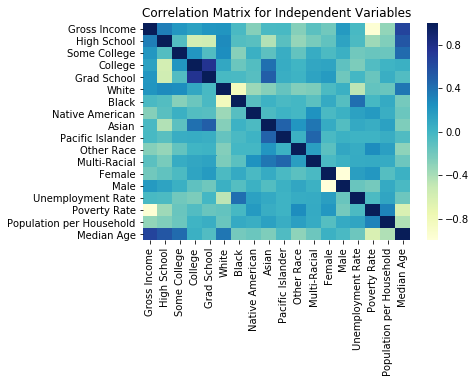

In [47]:
# Correlation Matrix

independent_variables = ['gross_income_pc', 'high_school_pc'     ,  'some_college_pc'     , 'college_pc'        , 
                         'grad_school_pc' , 'white_pc'           ,  'black_pc'            , 'native_american_pc', 
                         'asian_pc'       , 'pacific_islander_pc',  'other_pc'            , 'multi_racial_pc'   ,
                         'female_pc'      , 'male_pc'            ,  'unemployment_rate_pc', 'poverty_rate_pc'   , 
                         'pop_household'  , 'median_age'         ]

labels = ['Gross Income', 'High School'     , 'Some College'     , 'College'        , 
          'Grad School' , 'White'           , 'Black'            , 'Native American', 
          'Asian'       , 'Pacific Islander', 'Other Race'       , 'Multi-Racial'   ,
          'Female'      , 'Male'            , 'Unemployment Rate', 'Poverty Rate'   , 
          'Population per Household', 'Median Age']

data_for_correlation = climate_census[independent_variables]


correlation = plt.axes()
sns.heatmap(data_for_correlation.corr(), 
            cmap = "YlGnBu", 
            yticklabels = labels,
            xticklabels = labels,)
correlation.set_title('Correlation Matrix for Independent Variables')
correlation(figsize=(9,12))
plt.tight_layout()
# Save Figure
plt.savefig("Images/correlation_matrix.png")
plt.show()



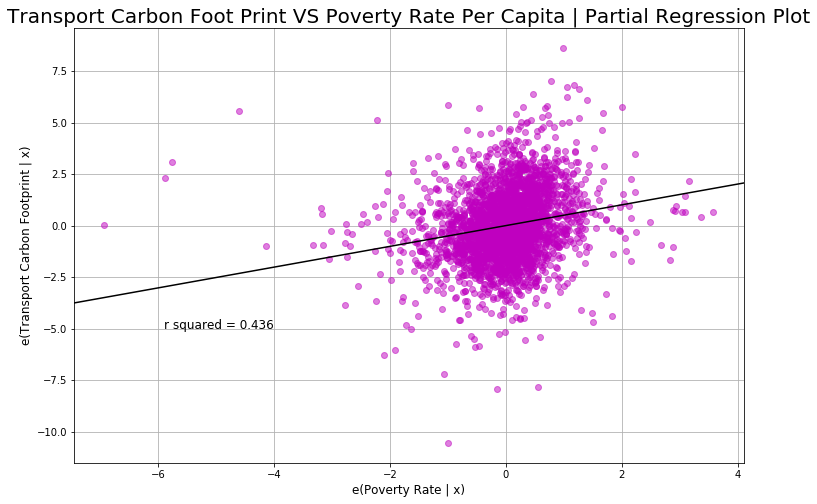

In [20]:
#Regression with robustcov
# Regressions on transportation
lm_transport = smf.ols(formula = 'transport_fp ~ median_age + high_school_pc + some_college_pc + college_pc + grad_school_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + unemployment_rate_pc + poverty_rate_pc + pop_household', 
                       data = climate_census).fit().get_robustcov_results()
#print(lm_transport.params) 
lm_transport_summary = lm_transport.summary()

transport_poverty = lm_transport.params[len(lm_transport.params) - 2]
transport_poverty

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("transport_fp", "poverty_rate_pc", ['gross_income_pc', 'high_school_pc'     ,  'some_college_pc'     , 'college_pc'        , 
                                                                       'grad_school_pc' , 'white_pc'           ,  'black_pc'            , 'native_american_pc',                
                                                                       'asian_pc'       , 'pacific_islander_pc',  'other_pc'            , 'multi_racial_pc'   ,
                                                                       'female_pc'      , 'male_pc'            ,  'unemployment_rate_pc', 'pop_household'     ,
                                                                       'median_age'], 
                                   data = climate_census, 
                                   ax = ax, 
                                   marker = 'o', 
                                   alpha = .50, 
                                   color = "m", 
                                   obs_labels = False)

ax.set_title("Transport Carbon Foot Print VS Poverty Rate Per Capita | Partial Regression Plot", size = 20)

ax.set_xlabel("e(Poverty Rate | x)", size = 12)

ax.set_ylabel("e(Transport Carbon Footprint | x)", size = 12)

ax.set_size9 = (10,10)

transport_r_squared = round(lm_transport.rsquared,3)

transport_r_squared_label = f"r squared = {transport_r_squared}"
plt.text(-5.9, -5, transport_r_squared_label, fontsize = 12)

plt.grid(True)

# Save Figure
plt.savefig("Images/transport_cfp.png")


plt.show()




C:\Users\Hamilton\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  'rank is %d' % (J, J_), ValueWarning)


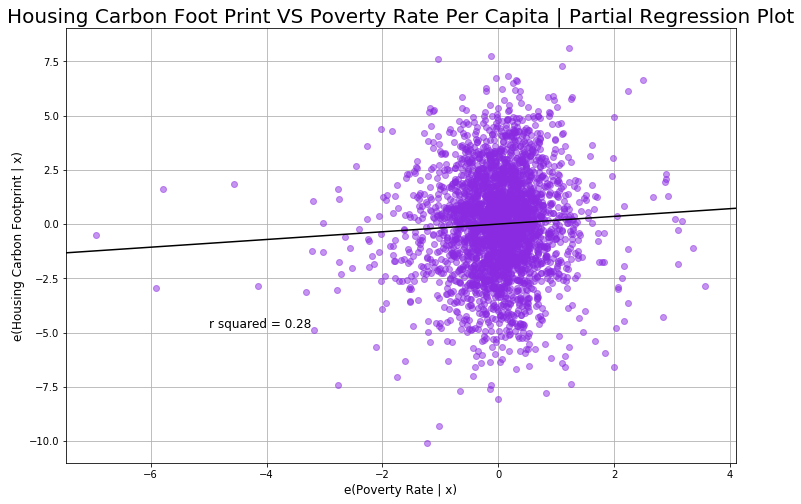

In [49]:
# Regressions on  housing
lm_housing = smf.ols(formula = 'housing_fp ~ median_age + gross_income_pc + high_school_pc + some_college_pc + college_pc + grad_school_pc + white_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + male_pc + unemployment_rate_pc + poverty_rate_pc + pop_household', 
                     data = climate_census).fit().get_robustcov_results()
#print(lm_housing.params) 
lm_housing_summary = lm_housing.summary()

housing_poverty = lm_housing.params[len(lm_housing.params) - 2]
housing_poverty

fig, ax = plt.subplots(figsize = (12,8))
fig = sm.graphics.plot_partregress("housing_fp", "poverty_rate_pc", ['gross_income_pc', 'high_school_pc'     ,  'some_college_pc'      , 'college_pc'        , 
                                                                     'grad_school_pc' , 'white_pc'           ,  'black_pc'             , 'native_american_pc',               
                                                                     'asian_pc'       , 'pacific_islander_pc',  'other_pc'             , 'multi_racial_pc'   ,
                                                                     'female_pc'      , 'male_pc'            ,  'unemployment_rate_pc' , 'pop_household'     ], 
                                   data = climate_census, 
                                   ax = ax, 
                                   marker = 'o',
                                   alpha = 0.5, 
                                   color = "blueviolet",
                                   obs_labels = False)

ax.set_title("Housing Carbon Foot Print VS Poverty Rate Per Capita | Partial Regression Plot", size = 20)
ax.set_xlabel("e(Poverty Rate | x)", size = 12)
ax.set_ylabel("e(Housing Carbon Footprint | x)", size = 12)

ax.set_size=(10,10)

housing_r_squared = round(lm_housing.rsquared, 3)
housing_r_squared_label = f"r squared = {housing_r_squared}"
plt.text(-5.0, -4.8, housing_r_squared_label, fontsize = 12)

plt.grid(True)


# Save Figure
plt.savefig("Images/housing_cfp.png")

plt.show()


C:\Users\Hamilton\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  'rank is %d' % (J, J_), ValueWarning)


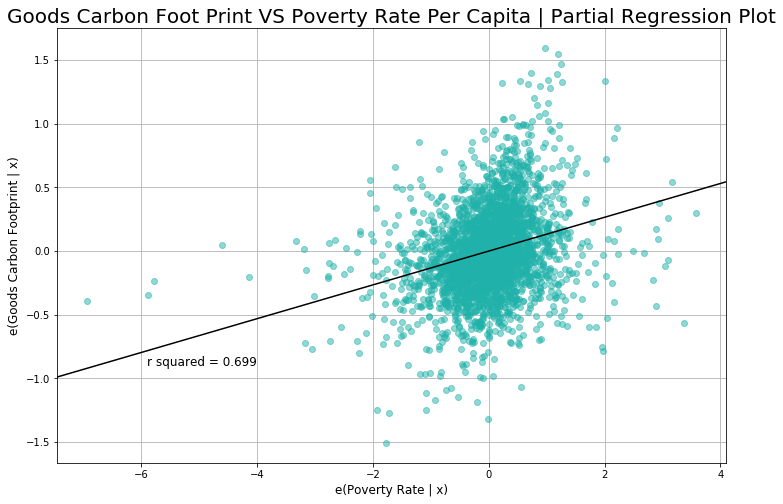

In [31]:
# Regressions on goods 
lm_goods = smf.ols(formula = 'goods_fp ~ median_age + gross_income_pc + high_school_pc + some_college_pc + college_pc + grad_school_pc + white_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + male_pc + unemployment_rate_pc + poverty_rate_pc + pop_household', 
                   data = climate_census).fit().get_robustcov_results()
#print(lm_goods.params) 
lm_goods_summary = lm_goods.summary()

goods_poverty = lm_goods.params[len(lm_goods.params) - 2]
goods_poverty

fig, ax = plt.subplots(figsize = (12,8))
fig = sm.graphics.plot_partregress("goods_fp", "poverty_rate_pc", ['gross_income_pc', 'high_school_pc'     ,  'some_college_pc'     , 'college_pc'        , 
                                                                   'grad_school_pc' , 'white_pc'           ,  'black_pc'            , 'native_american_pc',                
                                                                   'asian_pc'       , 'pacific_islander_pc',  'other_pc'            , 'multi_racial_pc'   ,
                                                                   'female_pc'      , 'male_pc'            ,  'unemployment_rate_pc', 'pop_household'     ,
                                                                   'median_age'], 
                                   data = climate_census, 
                                   ax = ax, 
                                   marker = 'o', 
                                   alpha = .50, 
                                   color = "lightseagreen", 
                                   obs_labels = False)

ax.set_title("Goods Carbon Foot Print VS Poverty Rate Per Capita | Partial Regression Plot", size = 20)
ax.set_xlabel("e(Poverty Rate | x)", size = 12)
ax.set_ylabel("e(Goods Carbon Footprint | x)", size = 12)

ax.set_size=(10,10)

goods_r_squared = round(lm_goods.rsquared,3)

goods_r_squared_label = f"r squared = {goods_r_squared}"

plt.text(-5.9, -.9, goods_r_squared_label, fontsize = 12)

plt.grid(True)

# Save Figure
plt.savefig("Images/goods_cfp.png")

plt.show()



C:\Users\Hamilton\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  'rank is %d' % (J, J_), ValueWarning)


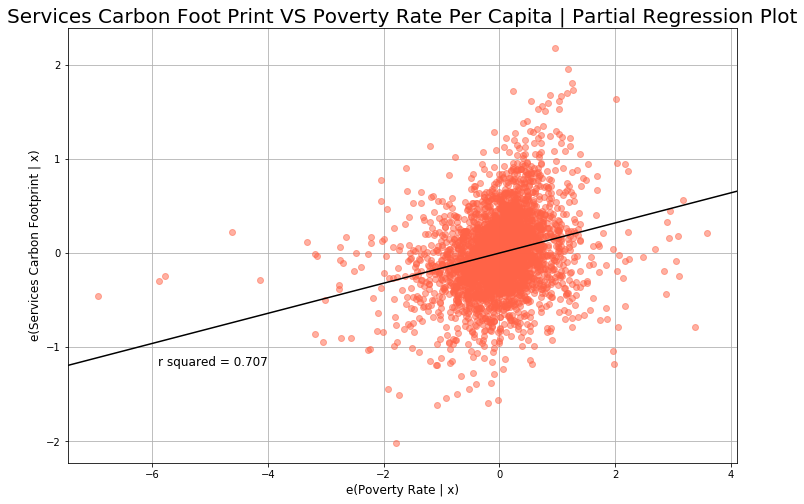

In [23]:
#Regression
# Regressions on services 
lm_services = smf.ols(formula = 'services_fp ~ median_age + gross_income_pc + high_school_pc + some_college_pc + college_pc + grad_school_pc + white_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + male_pc + unemployment_rate_pc + poverty_rate_pc + pop_household', data = climate_census).fit().get_robustcov_results()
#print(lm_services.params) 
lm_services_summary = lm_services.summary()

services_poverty = lm_services.params[len(lm_services.params) - 2]
services_poverty

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("services_fp", "poverty_rate_pc", ['gross_income_pc', 'high_school_pc'     ,  'some_college_pc'     , 'college_pc'        , 
                                                                      'grad_school_pc' , 'white_pc'           ,  'black_pc'            , 'native_american_pc',                
                                                                      'asian_pc'       , 'pacific_islander_pc',  'other_pc'            , 'multi_racial_pc'   ,
                                                                      'female_pc'      , 'male_pc'            ,  'unemployment_rate_pc', 'pop_household'     ,
                                                                      'median_age'], 
                                   data = climate_census, 
                                   ax = ax, 
                                   marker = 'o', 
                                   alpha = .50, 
                                   color = "tomato", 
                                   obs_labels = False)

ax.set_title("Services Carbon Foot Print VS Poverty Rate Per Capita | Partial Regression Plot", size = 20)
ax.set_xlabel("e(Poverty Rate | x)", size = 12)
ax.set_ylabel("e(Services Carbon Footprint | x)", size = 12)

services_r_squared = round(lm_services.rsquared,3)

services_r_squared_label = f"r squared = {services_r_squared}"

plt.text(-5.9, -1.2, services_r_squared_label, fontsize = 12)

plt.grid(True)

# Save Figure
plt.savefig("Images/services_cfp.png")

plt.show()

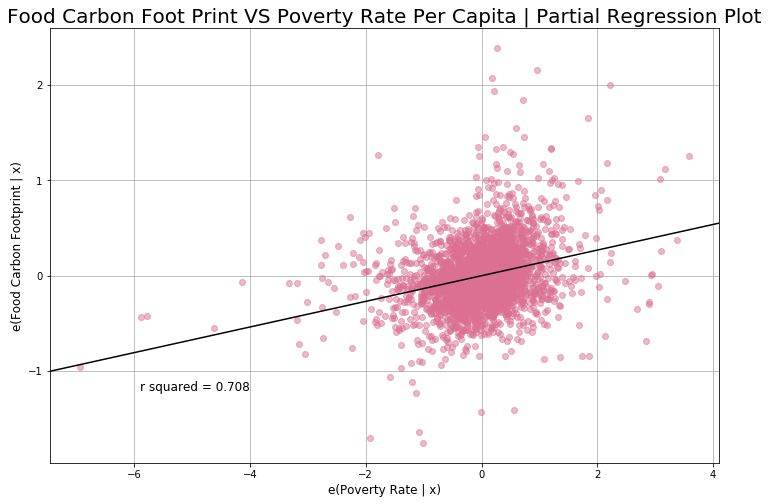

In [24]:
#Regression
# Regressions on food 
lm_food_fp = smf.ols(formula = 'food_fp ~ median_age + gross_income_pc + high_school_pc + some_college_pc + college_pc + grad_school_pc + white_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + male_pc + unemployment_rate_pc + poverty_rate_pc + pop_household', data = climate_census).fit().get_robustcov_results()
#print(lm_services.params) 
lm_food_fp_summary = lm_services.summary()

food_poverty = lm_food_fp.params[len(lm_food_fp.params) - 2]
food_poverty

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("food_fp", "poverty_rate_pc", ['gross_income_pc', 'high_school_pc'     ,  'some_college_pc'     , 'college_pc'        , 
                                                                      'grad_school_pc' , 'white_pc'           ,  'black_pc'            , 'native_american_pc',                
                                                                      'asian_pc'       , 'pacific_islander_pc',  'other_pc'            , 'multi_racial_pc'   ,
                                                                      'female_pc'      , 'male_pc'            ,  'unemployment_rate_pc', 'pop_household'     ,
                                                                      'median_age'], 
                                   data = climate_census, 
                                   ax = ax, 
                                   marker = 'o', 
                                   alpha = .50, 
                                   color = "palevioletred", 
                                   obs_labels = False)

ax.set_title("Food Carbon Foot Print VS Poverty Rate Per Capita | Partial Regression Plot", size = 20)
ax.set_xlabel("e(Poverty Rate | x)", size = 12)
ax.set_ylabel("e(Food Carbon Footprint | x)", size = 12)

food_r_squared = round(lm_food_fp.rsquared,3)

food_r_squared_label = f"r squared = {food_r_squared}"

plt.text(-5.9, -1.2, food_r_squared_label, fontsize = 12)

plt.grid(True)

# Save Figure
plt.savefig("Images/food_cfp.png")

plt.show()

In [37]:
summary_dict = {'Outcome' : ["Transport", "Housing", "Goods", "Services", "Food"],
                'Values'  : [transport_poverty, 
                             housing_poverty, 
                             goods_poverty, 
                             services_poverty, 
                             food_poverty]}

type(summary_dict)

dict

In [38]:
summary = pd.DataFrame.from_dict(summary_dict)
summary

,Outcome,Values
0,Transport,0.362612
1,Housing,0.170124
2,Goods,0.132611
3,Services,0.160177
4,Food,0.134261


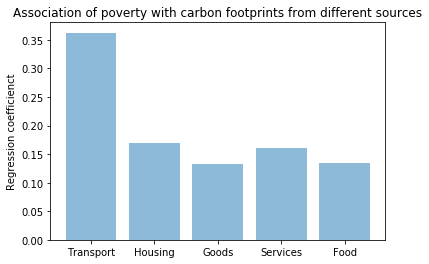

In [48]:
plt.bar(summary['Outcome'], 
        summary['Values'], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.ylabel('Regression coefficienct')
plt.title('Association of poverty with carbon footprints from different sources')

# Save Figure
plt.savefig("Images/poverty_dvs.png")

plt.show()